In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats

# Part 1

### A.

Set $r = \frac{1}{2}$. The unit square centered at $(\frac{1}{2}, \frac{1}{2})$ has side length $1 = 2r$, so its area is $(2r)^2 = (2 \times \frac{1}{2})^2 = 1$. The largest circle contained in this square is the circle of radius r centered at $(\frac{1}{2}, \frac{1}{2})$, and its area is $πr^2 = \frac{π}{4}$. Notice the ratio of the circle's area to the square's area is $\frac{π}{4}$.

We can randomly generate points (i.e., pairs of uniform random numbers) in the square and get the proportion of those points that also lie inside the circle. This proportion should heuristically equal the ratio of the areas since the larger the area is, the more likely a point will be inside it.

To determine if a point lies inside the circle, we check whether it satisfies the inequality $(x-0.5)^2 + (y-0.5)^2 \leq 0.5^2$, which is the implicit equation of the filled in circle. After calculating this proportion, since it should approximately equal the true ratio of $\frac{π}{4}$, we multiply it by 4 to get an estimate of π.

In [ ]:
def estimate_pi(num):
  np.random.seed(0) # Sets the seed to 0
  num_in_circle = 0 # Counter for the number of points inside the circle
  num_total = num # Total number of points

  for i in range(num_total):
    x = np.random.uniform(0, 1) # Generates the first coordinate of the point
    y = np.random.uniform(0, 1) # Generates the second coordinate of the point
    if (pow((x - 0.5), 2) + pow((y - 0.5), 2) <= 0.25):
      num_in_circle += 1

  return 4 * num_in_circle / num_total

print(estimate_pi(100000))

3.1422


# Part 2

### A.


In [ ]:
np.random.seed(0)
sizes = [10, 25, 50, 100, 250, 500]
var = 4
bias_1_lst, bias_2_lst = [], []

for size in sizes: # Iterates over each of the sizes
  estimator_1_lst, estimator_2_lst = [], []

  for i in range(1000):
    samples = [] # Array to contain the samples

    for j in range(size):
      samples.append(np.random.normal(2, 2)) # Generates the samples (sample size determined by 'size')

    # Calculates the numerator of the estimators:
    sample_mean = np.mean(samples)
    sum = 0
    for sample in samples:
      sum += pow((sample - sample_mean), 2)

    estimator_1_lst.append(sum / (size - 1)) # Appends the first estimator (with a 1/n-1 factor)
    estimator_2_lst.append(sum / size) # Appends the second estimator for variance

  estimator_1_mean, estimator_2_mean = np.mean(estimator_1_lst), np.mean(estimator_2_lst) # Calculates the mean of each estimator
  bias_1 = estimator_1_mean - var # The bias of the first estimator
  bias_2 = estimator_2_mean - var # THe bias of the second estimator

  bias_1_lst.append(bias_1) # Creates a list of the biases of the first estimator for the next question
  bias_2_lst.append(bias_2) # Creates a list of the biases of the second estimator for the next question

  print("Sample size: " + str(size) + ", the bias of the first estimator: " + str(bias_1) + ", the bias of the second: " + str(bias_2))

Sample size: 10, the bias of the first estimator: -0.07594573889978351, the bias of the second: -0.46835116500980467
Sample size: 25, the bias of the first estimator: -0.0170483427700856, the bias of the second: -0.1763664090592818
Sample size: 50, the bias of the first estimator: -0.02065598564644544, the bias of the second: -0.10024286593351661
Sample size: 100, the bias of the first estimator: -0.012797575628888502, the bias of the second: -0.05266959987259945
Sample size: 250, the bias of the first estimator: 0.0014821442894419334, the bias of the second: -0.014523784287716168
Sample size: 500, the bias of the first estimator: 0.005159628472188871, the bias of the second: -0.0028506907847556384


### B.

Text(0.5, 0, 'Second estimator')

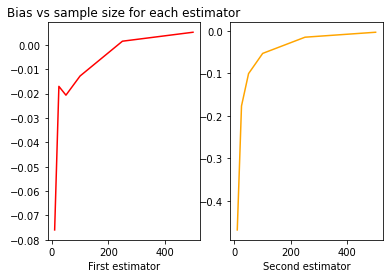

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Bias vs sample size for each estimator")
plt.plot(sizes, bias_1_lst, "red")
plt.xlabel("First estimator")
plt.subplot(1, 2, 2)
plt.plot(sizes, bias_2_lst, "orange")
plt.xlabel("Second estimator")

# Part 4

### A.

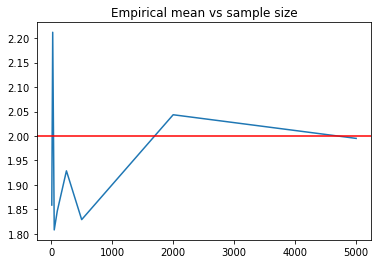

In [ ]:
s = [10, 25, 50, 100, 250, 500, 2000, 5000]
np.random.seed(55)
means = []

for size in s:
  samples = []
  for i in range(size):
    samples.append(np.random.exponential(2))
  m = np.mean(samples)
  means.append(m)

plt.title("Empirical mean vs sample size")
plt.plot(s, means)
plt.axhline(y = 2, color = 'r', linestyle = '-')

### B.

<Figure size 432x288 with 0 Axes>

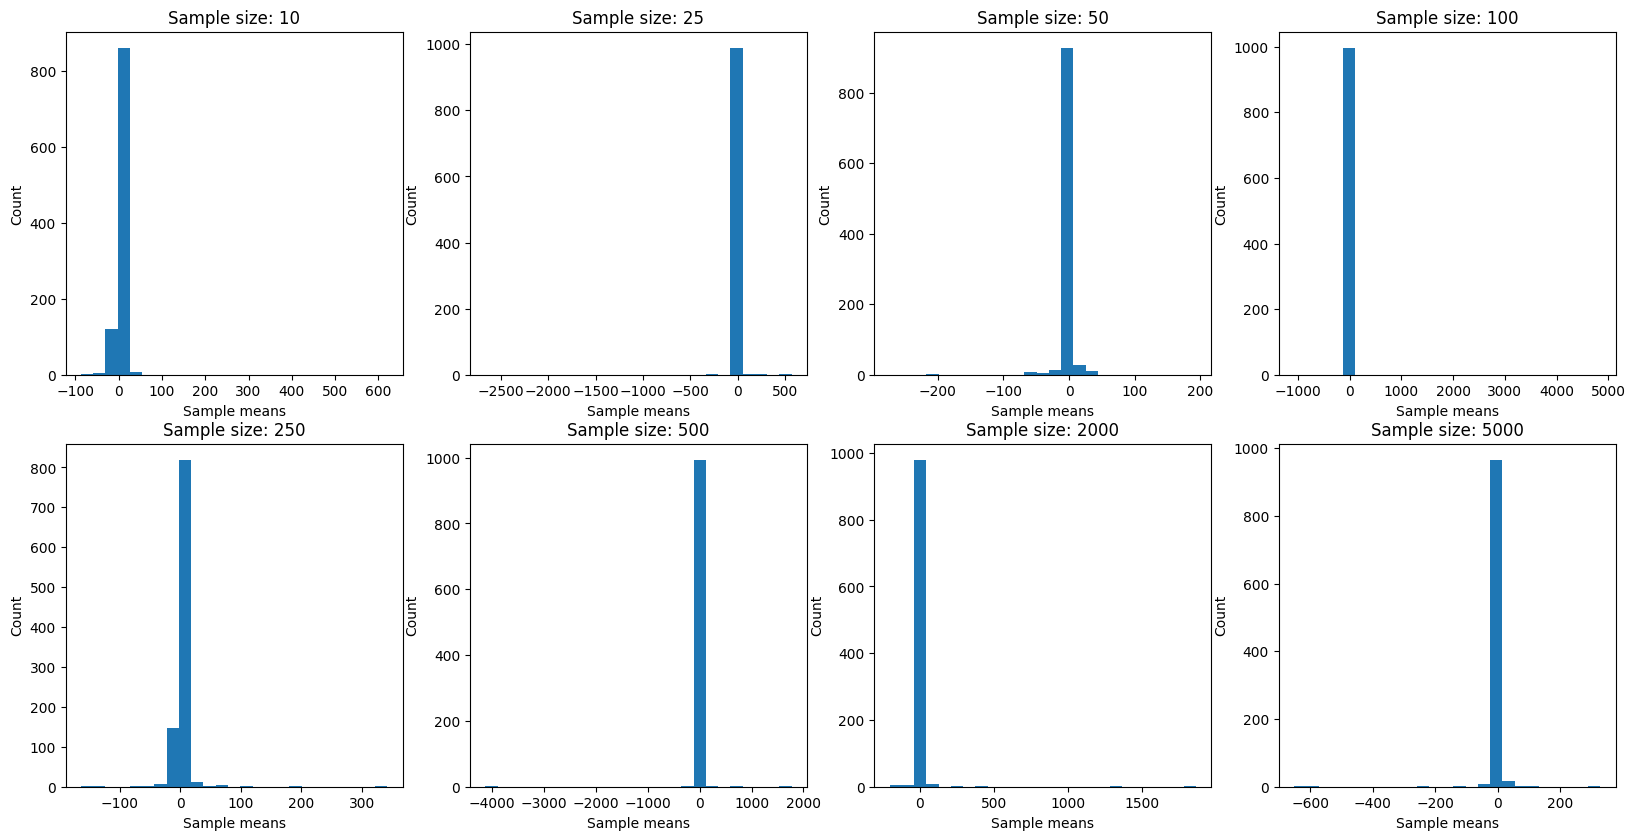

In [ ]:
np.random.seed(55)
plt.suptitle("Histograms for sample means from the standard Cauchy distribution for each sample size")
plt.figure(figsize=(20, 10), dpi=100)

for i in range(len(s)): # Iterates over the sizes
  ms = []
  for j in range(1000):
    samples = []
    for k in range(s[i]):
      samples.append(np.random.standard_cauchy())

    ms.append(np.mean(samples))

  plt.subplot(2, 4, i+1)
  plt.hist(ms, bins = 25)
  plt.title(f"Sample size: {s[i]}")
  plt.xlabel("Sample means")
  plt.ylabel("Count")